In [1]:
#importing libraries needed for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer, StandardScaler, minmax_scale
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
import random

In [2]:
#extracting raw data and converting into Data Frame
df = pd.read_csv("./Data/data.csv")
df = pd.DataFrame(df)
df[" Research and development expense rate"]

0       0.000000e+00
1       0.000000e+00
2       2.550000e+07
3       0.000000e+00
4       0.000000e+00
            ...     
6814    4.500000e+09
6815    1.440000e+09
6816    1.039086e-04
6817    2.510000e+09
6818    0.000000e+00
Name:  Research and development expense rate, Length: 6819, dtype: float64

In [3]:
#checking df info
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [4]:
#checking first 20 columns correlation
df1 = df.iloc[:, np.r_[0:20]]
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 20 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

<AxesSubplot:>

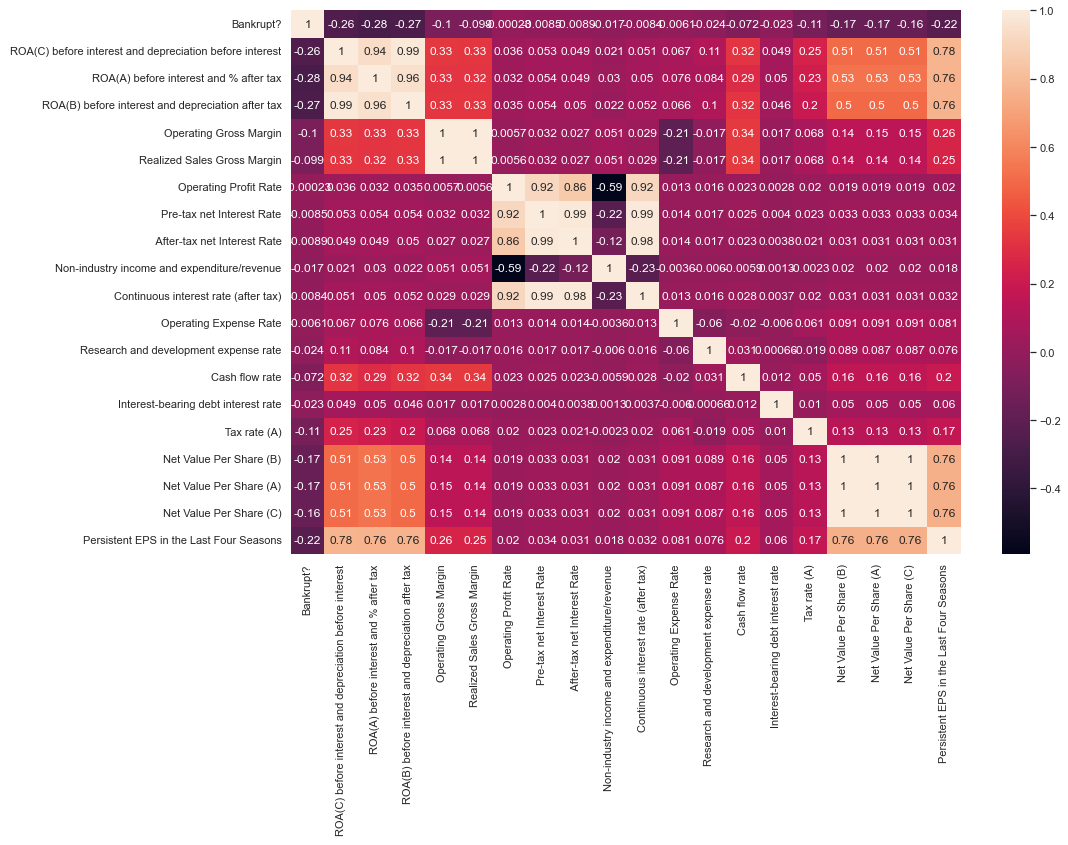

In [5]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df1.corr(), annot=True)


In [6]:
#detecting and saving high correleted features
corr_matrix=df.corr().abs()
upper_triangle=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
[column for column in upper_triangle.columns if any(upper_triangle[column] > 0.90)]
high_corr_clm = [' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Realized Sales Gross Margin',
 ' Pre-tax net Interest Rate',
 ' After-tax net Interest Rate',
 ' Continuous interest rate (after tax)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Regular Net Profit Growth Rate',
 ' Net worth/Assets',
 ' Operating profit/Paid-in capital',
 ' Net profit before tax/Paid-in capital',
 ' Cash Flow to Sales',
 ' Current Liability to Liability',
 ' Current Liability to Equity',
 ' Net Income to Total Assets',
 ' Gross Profit to Sales',
 ' Liability to Equity']

In [7]:
#dropping high correleted features
df.drop(high_corr_clm, axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 77 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    Operating Gross Margin                                   6819 non-null   float64
 3    Operating Profit Rate                                    6819 non-null   float64
 4    Non-industry income and expenditure/revenue              6819 non-null   float64
 5    Operating Expense Rate                                   6819 non-null   float64
 6    Research and development expense rate                    6819 non-null   float64
 7    Cash flow rate                                           6819 non-null   float64
 8    Interest-bearing 

In [9]:
#breacking df into smaller parts
df1 = df.iloc[:, np.r_[0:15]]
df2 = df.iloc[:, np.r_[16:30]]
df3 = df.iloc[:, np.r_[31:45]]
df4 = df.iloc[:, np.r_[45:60]]
df5 = df.iloc[:, np.r_[61:75]]

array([[<AxesSubplot:title={'center':'Bankrupt?'}>,
        <AxesSubplot:title={'center':' ROA(C) before interest and depreciation before interest'}>,
        <AxesSubplot:title={'center':' Operating Gross Margin'}>,
        <AxesSubplot:title={'center':' Operating Profit Rate'}>],
       [<AxesSubplot:title={'center':' Non-industry income and expenditure/revenue'}>,
        <AxesSubplot:title={'center':' Operating Expense Rate'}>,
        <AxesSubplot:title={'center':' Research and development expense rate'}>,
        <AxesSubplot:title={'center':' Cash flow rate'}>],
       [<AxesSubplot:title={'center':' Interest-bearing debt interest rate'}>,
        <AxesSubplot:title={'center':' Tax rate (A)'}>,
        <AxesSubplot:title={'center':' Net Value Per Share (B)'}>,
        <AxesSubplot:title={'center':' Persistent EPS in the Last Four Seasons'}>],
       [<AxesSubplot:title={'center':' Cash Flow Per Share'}>,
        <AxesSubplot:title={'center':' Revenue Per Share (Yuan ¥)'}>,
     

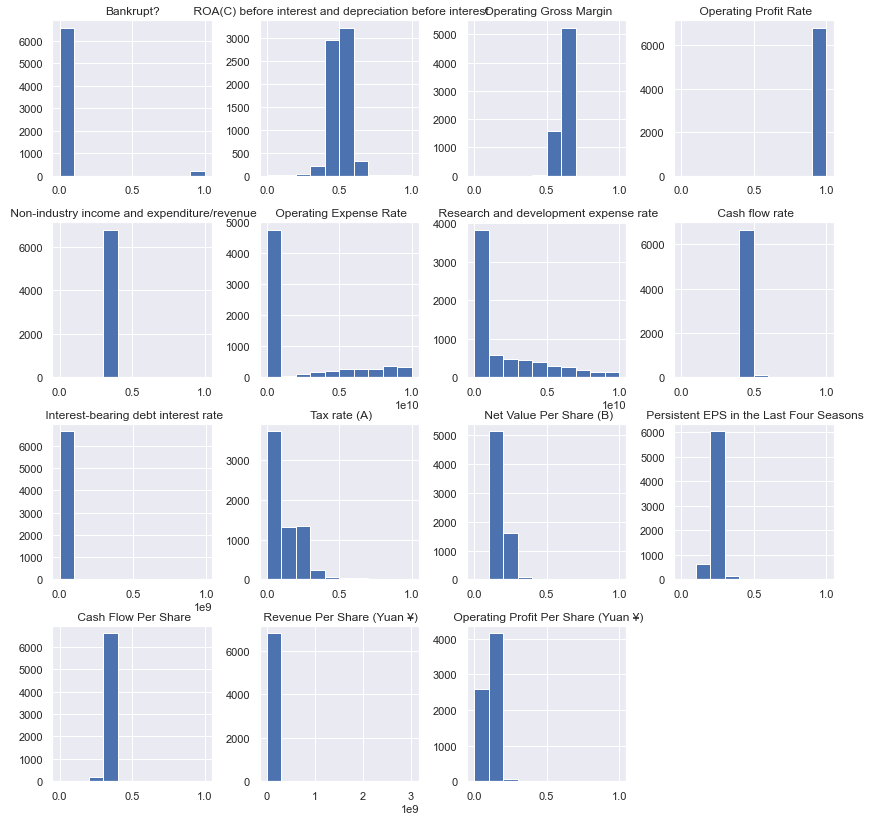

In [10]:
df1.hist(figsize=(14,14))

array([[<AxesSubplot:title={'center':' Operating Profit Growth Rate'}>,
        <AxesSubplot:title={'center':' After-tax Net Profit Growth Rate'}>,
        <AxesSubplot:title={'center':' Continuous Net Profit Growth Rate'}>,
        <AxesSubplot:title={'center':' Total Asset Growth Rate'}>],
       [<AxesSubplot:title={'center':' Net Value Growth Rate'}>,
        <AxesSubplot:title={'center':' Total Asset Return Growth Rate Ratio'}>,
        <AxesSubplot:title={'center':' Cash Reinvestment %'}>,
        <AxesSubplot:title={'center':' Current Ratio'}>],
       [<AxesSubplot:title={'center':' Quick Ratio'}>,
        <AxesSubplot:title={'center':' Interest Expense Ratio'}>,
        <AxesSubplot:title={'center':' Total debt/Total net worth'}>,
        <AxesSubplot:title={'center':' Debt ratio %'}>],
       [<AxesSubplot:title={'center':' Long-term fund suitability ratio (A)'}>,
        <AxesSubplot:title={'center':' Borrowing dependency'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=o

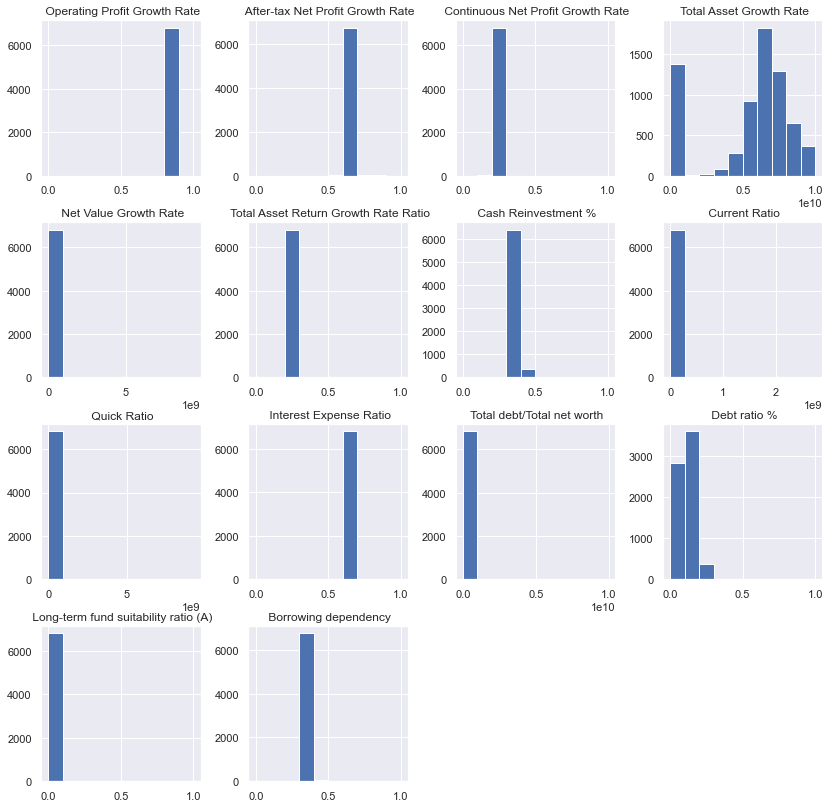

In [11]:
df2.hist(figsize=(14,14))

array([[<AxesSubplot:title={'center':' Inventory and accounts receivable/Net value'}>,
        <AxesSubplot:title={'center':' Total Asset Turnover'}>,
        <AxesSubplot:title={'center':' Accounts Receivable Turnover'}>,
        <AxesSubplot:title={'center':' Average Collection Days'}>],
       [<AxesSubplot:title={'center':' Inventory Turnover Rate (times)'}>,
        <AxesSubplot:title={'center':' Fixed Assets Turnover Frequency'}>,
        <AxesSubplot:title={'center':' Net Worth Turnover Rate (times)'}>,
        <AxesSubplot:title={'center':' Revenue per person'}>],
       [<AxesSubplot:title={'center':' Operating profit per person'}>,
        <AxesSubplot:title={'center':' Allocation rate per person'}>,
        <AxesSubplot:title={'center':' Working Capital to Total Assets'}>,
        <AxesSubplot:title={'center':' Quick Assets/Total Assets'}>],
       [<AxesSubplot:title={'center':' Current Assets/Total Assets'}>,
        <AxesSubplot:title={'center':' Cash/Total Assets'}>,
   

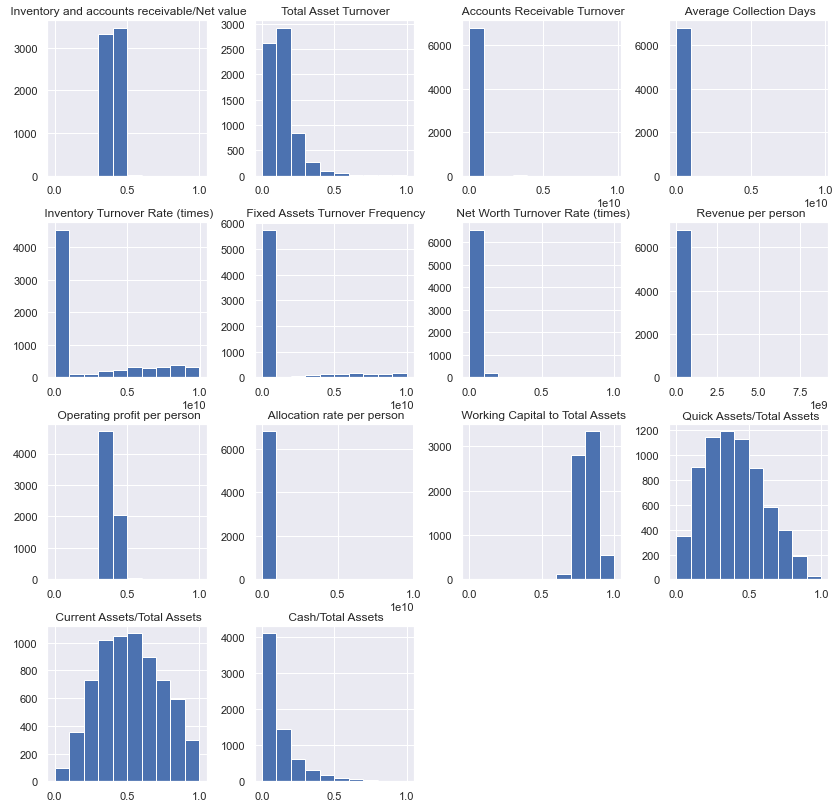

In [12]:
df3.hist(figsize=(14,14))

array([[<AxesSubplot:title={'center':' Quick Assets/Current Liability'}>,
        <AxesSubplot:title={'center':' Cash/Current Liability'}>,
        <AxesSubplot:title={'center':' Current Liability to Assets'}>,
        <AxesSubplot:title={'center':' Operating Funds to Liability'}>],
       [<AxesSubplot:title={'center':' Inventory/Working Capital'}>,
        <AxesSubplot:title={'center':' Inventory/Current Liability'}>,
        <AxesSubplot:title={'center':' Current Liabilities/Liability'}>,
        <AxesSubplot:title={'center':' Working Capital/Equity'}>],
       [<AxesSubplot:title={'center':' Current Liabilities/Equity'}>,
        <AxesSubplot:title={'center':' Long-term Liability to Current Assets'}>,
        <AxesSubplot:title={'center':' Retained Earnings to Total Assets'}>,
        <AxesSubplot:title={'center':' Total income/Total expense'}>],
       [<AxesSubplot:title={'center':' Total expense/Assets'}>,
        <AxesSubplot:title={'center':' Current Asset Turnover Rate'}>,
  

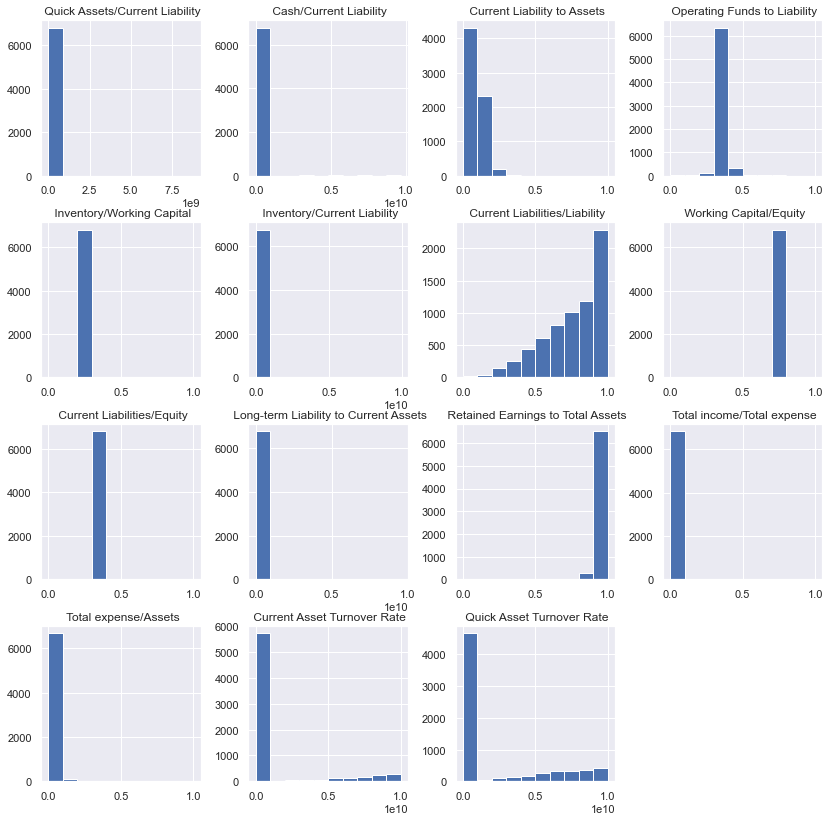

In [13]:
df4.hist(figsize=(14,14))

array([[<AxesSubplot:title={'center':' Cash Turnover Rate'}>,
        <AxesSubplot:title={'center':' Fixed Assets to Assets'}>,
        <AxesSubplot:title={'center':' Equity to Long-term Liability'}>,
        <AxesSubplot:title={'center':' Cash Flow to Total Assets'}>],
       [<AxesSubplot:title={'center':' Cash Flow to Liability'}>,
        <AxesSubplot:title={'center':' CFO to Assets'}>,
        <AxesSubplot:title={'center':' Cash Flow to Equity'}>,
        <AxesSubplot:title={'center':' Current Liability to Current Assets'}>],
       [<AxesSubplot:title={'center':' Liability-Assets Flag'}>,
        <AxesSubplot:title={'center':' Total assets to GNP price'}>,
        <AxesSubplot:title={'center':' No-credit Interval'}>,
        <AxesSubplot:title={'center':" Net Income to Stockholder's Equity"}>],
       [<AxesSubplot:title={'center':' Degree of Financial Leverage (DFL)'}>,
        <AxesSubplot:title={'center':' Interest Coverage Ratio (Interest expense to EBIT)'}>,
        <AxesSub

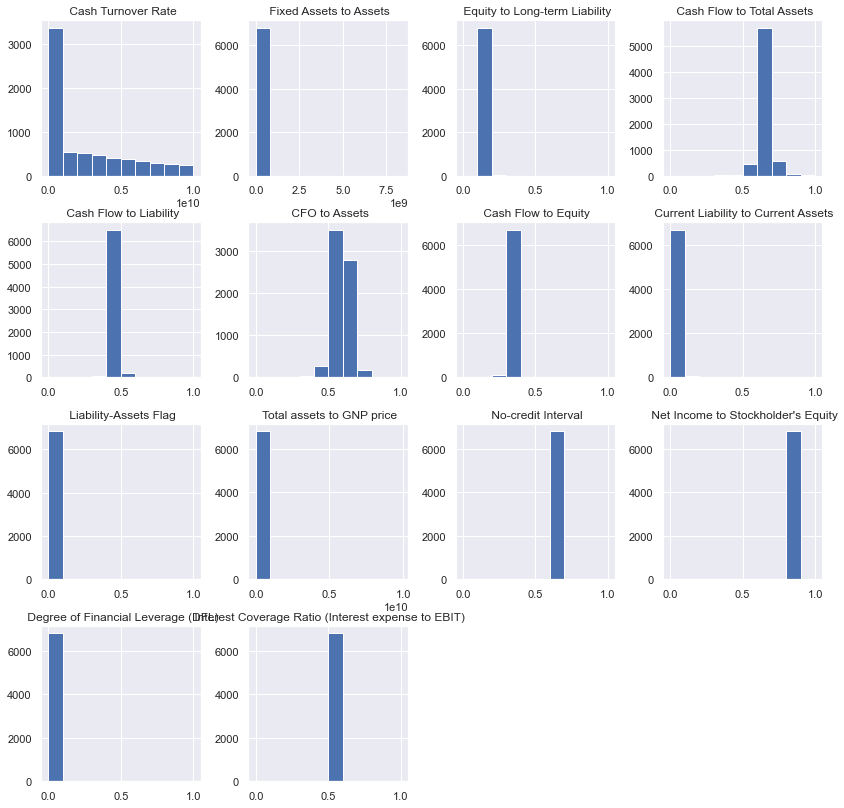

In [14]:
df5.hist(figsize=(14,14))

In [15]:
#manual checking unnecessary features for business profitability
unimport_ftrs = [' Operating Profit Rate',
                 ' Non-industry income and expenditure/revenue', 
                 ' Interest-bearing debt interest rate',
                 ' Revenue Per Share (Yuan ¥)',
                 ' Operating Profit Growth Rate',
                 ' After-tax Net Profit Growth Rate',
                 ' Continuous Net Profit Growth Rate',
                 ' Net Value Growth Rate',
                 ' Total Asset Return Growth Rate Ratio',
                 ' Current Ratio',
                 ' Quick Ratio',
                 ' Interest Expense Ratio',
                 ' Total debt/Total net worth',
                 ' Long-term fund suitability ratio (A)',
                 ' Borrowing dependency',
                 ' Accounts Receivable Turnover',
                 ' Average Collection Days',
                 ' Revenue per person',
                 ' Allocation rate per person',
                 ' Quick Assets/Current Liability',
                 ' Cash/Current Liability',
                 ' Inventory/Working Capital',
                 ' Inventory/Current Liability',
                 ' Working Capital/Equity',
                 ' Current Liabilities/Equity',
                 ' Long-term Liability to Current Assets',
                 ' Total income/Total expense',
                 ' Fixed Assets to Assets',
                 ' Equity to Long-term Liability',
                 ' Current Liability to Current Assets',
                 ' Liability-Assets Flag',
                 ' Total assets to GNP price',
                 ' No-credit Interval',
                 " Net Income to Stockholder's Equity",
                 ' Degree of Financial Leverage (DFL)',
                 ' Interest Coverage Ratio (Interest expense to EBIT)'
                                                                        ]

In [16]:
#dropping filteres features
df.drop(unimport_ftrs, axis=1, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 41 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    Operating Gross Margin                                   6819 non-null   float64
 3    Operating Expense Rate                                   6819 non-null   float64
 4    Research and development expense rate                    6819 non-null   float64
 5    Cash flow rate                                           6819 non-null   float64
 6    Tax rate (A)                                             6819 non-null   float64
 7    Net Value Per Share (B)                                  6819 non-null   float64
 8    Persistent EPS in

#checking how many bunkrupted vs not bunkrupted companies we have
y.value_counts()

In [18]:
#creating 2 df's for modelling

X=df.drop('Bankrupt?', axis=1)
y=df['Bankrupt?']

#selecting features for minmax transformation
feat_to_stand = [" Operating Expense Rate",
                 " Research and development expense rate",
                 " Current Asset Turnover Rate",
                 " Quick Asset Turnover Rate",
                 " Cash Turnover Rate",
                 " Fixed Assets Turnover Frequency",
                 " Inventory Turnover Rate (times)",
                 " Total Asset Growth Rate"
                ]

scaler = MinMaxScaler()
df[feat_to_stand] = scaler.fit_transform(df[feat_to_stand])

In [19]:
#splitting
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.20,random_state=17, stratify=y)

In [20]:
stc = StandardScaler()
X_train = stc.fit_transform(X_train)
X_test = stc.transform(X_test)


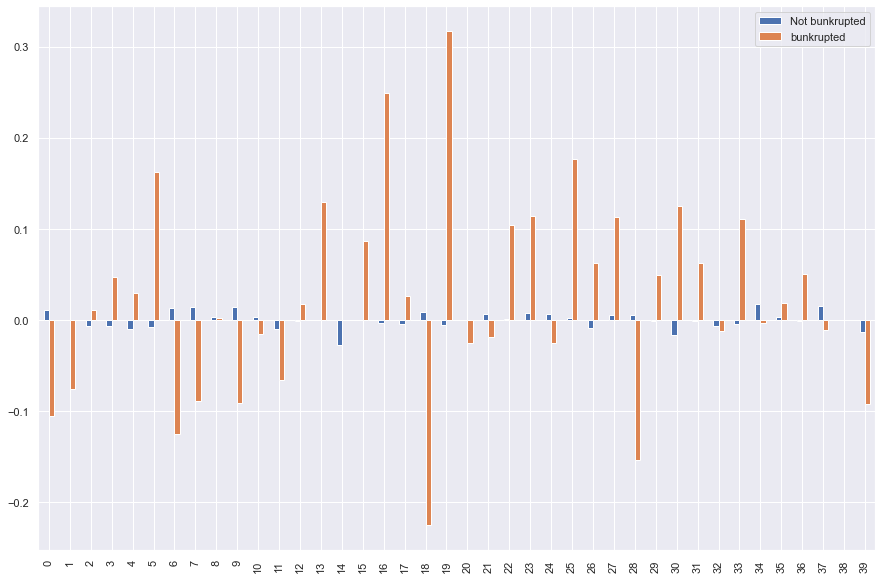

In [21]:
df_join = pd.DataFrame(X_train).join(pd.DataFrame(y_train))
df_mean = df_join.groupby('Bankrupt?').mean()
not_bunkr = df_mean.iloc[0]
bunkr = df_mean.iloc[1]
index = df_mean.columns
df_graph = pd.DataFrame({'Not bunkrupted': not_bunkr, 'bunkrupted': bunkr }, index=index)
ax = df_graph.plot(kind="bar")

In [22]:
smote = SMOTE()
y.value_counts()
X_sm, y_sm = smote.fit_resample(X_train, y_train)
X_sm = pd.DataFrame(data=X_sm,columns=X.columns)
y_sm = pd.DataFrame(data=y_sm,columns=['Bankrupt?'])
y.value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [23]:
#checking features with high importancy
from sklearn.feature_selection import RFE
data_final_vars=df.columns.values.tolist()
logreg = LogisticRegression(max_iter=1000)
rfe = RFE(logreg, n_features_to_select=20)
rfe = rfe.fit(X_sm, y_sm.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True False False False  True  True  True  True False  True False  True
 False  True  True  True False False  True  True False False False False
  True  True  True  True False False False  True False  True  True  True
 False False False False]
[ 1 14 17 16  1  1  1  1  5  1 18  1 11  1  1  1 13  6  1  1  9  2 20  3
  1  1  1  1 10 15 19  1  7  1  1  1 12  8 21  4]


In [24]:
#droping features selected by RFE
boolencolm = rfe.support_
X_sm = pd.DataFrame(X_sm).loc[:, boolencolm]
X_test = pd.DataFrame(X_test).loc[:, boolencolm]

In [25]:
#Simulating model to check forecasted outcome
import statsmodels.api as sm
logit_model=sm.Logit(y_sm,X_sm)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.460275
         Iterations 7
                                             Results: Logit
Model:                            Logit                         Pseudo R-squared:              0.336    
Dependent Variable:               Bankrupt?                     AIC:                           9759.1664
Date:                             2022-11-18 09:26              BIC:                           9904.4592
No. Observations:                 10558                         Log-Likelihood:                -4859.6  
Df Model:                         19                            LL-Null:                       -7318.2  
Df Residuals:                     10538                         LLR p-value:                   0.0000   
Converged:                        1.0000                        Scale:                         1.0000   
No. Iterations:                   7.0000                                                               

In [26]:
#running model with Sci Kit learn
logreg = LogisticRegression()
logreg.fit(X_sm, y_sm)

/Users/kirilltiufanov/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [27]:
#Overall accuracy of prediction
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89


/Users/kirilltiufanov/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/kirilltiufanov/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [28]:
#checking how many test predictions were correct vs wrong
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1181  139]
 [   6   38]]


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1320
           1       0.21      0.86      0.34        44

    accuracy                           0.89      1364
   macro avg       0.60      0.88      0.64      1364
weighted avg       0.97      0.89      0.92      1364



/Users/kirilltiufanov/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/kirilltiufanov/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


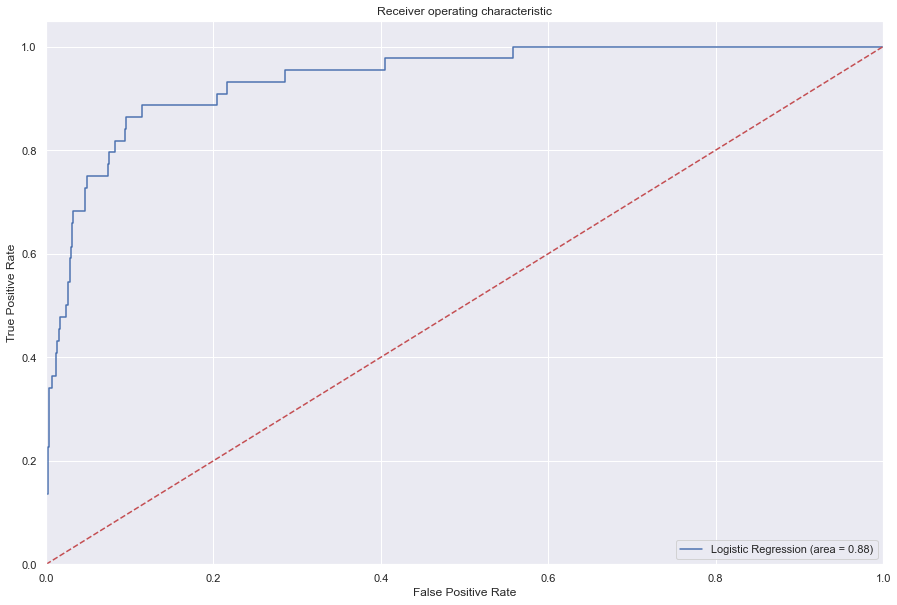

In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()